In [133]:
!pip install geopandas

In [138]:
# 시각화 도구 설치
!pip install plotnine 

In [1]:
import pandas as pd
import numpy as np

import requests
import openpyxl as xl
import time
import json

import folium
import re

import geopandas as gpd
from matplotlib import pyplot as plt # 그래프 그리는 용도
import seaborn as sns
import geopandas as gpd
from plotnine import *
from shapely.geometry import Point, Polygon

import warnings
warnings.filterwarnings(action='ignore') # 경고메세지 숨기기

In [54]:
import matplotlib as mpl
mpl.get_configdir()

'C:\\Users\\ajm10\\.matplotlib'

In [3]:
import matplotlib.font_manager as fm  # 폰트 관련 용도

path = 'C:/Users/ajm10/AppData/Local/Microsoft/Windows/Fonts/NanumGothicEco.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

#fm._rebuild()
#mpl.font_manager._rebuild()

NanumGothic Eco


<br>

# 행정동별 df

In [4]:
df = pd.read_excel("fin_dataset_zero.xlsx")
df = df.sort_values(["dong_nm"], ascending=True)
df = df.reset_index()
df = df.drop(columns={"index"})
df.head()

,goo_nm,dong_ID,dong_nm,dong_area,sum_pop,one_pop,cc_value,count_zero,count_market,count_univ,count_bus,count_station,sum_bus,sum_station,sum_order,sum_waste,y,x
0,송파구,11710631,가락1동,1.46,9534,1045,0,0,1,0,10,2,2605376,6434890,73694,4271.9,37.496537,127.105726
1,송파구,11710632,가락2동,1.34,11482,1892,10,0,2,0,22,2,2181971,3449427,73694,4271.9,37.498639,127.126488
2,송파구,11710620,가락본동,0.96,10576,2642,30,1,1,0,25,0,3081377,0,73694,4271.9,37.495585,127.121830
3,구로구,11530595,가리봉동,0.40,4901,2244,10,0,0,0,10,0,2235038,0,50971,1278.5,37.482704,126.888019
4,금천구,11545510,가산동,2.52,14124,8016,30,0,6,0,105,2,10824582,14509425,42334,3794.8,37.476681,126.883767


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   goo_nm         424 non-null    object 
 1   dong_ID        424 non-null    int64  
 2   dong_nm        424 non-null    object 
 3   dong_area      424 non-null    float64
 4   sum_pop        424 non-null    int64  
 5   one_pop        424 non-null    int64  
 6   cc_value       424 non-null    int64  
 7   count_zero     424 non-null    int64  
 8   count_market   424 non-null    int64  
 9   count_univ     424 non-null    int64  
 10  count_bus      424 non-null    int64  
 11  count_station  424 non-null    int64  
 12  sum_bus        424 non-null    int64  
 13  sum_station    424 non-null    int64  
 14  sum_order      424 non-null    int64  
 15  sum_waste      424 non-null    float64
 16  y              424 non-null    float64
 17  x              424 non-null    float64
dtypes: float64

In [10]:
df.describe()

,dong_ID,dong_area,sum_pop,one_pop,cc_value,count_zero,count_market,count_univ,count_bus,count_station,sum_bus,sum_station,sum_order,sum_waste,y,x
count,4.240000e+02,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02,4.240000e+02,424.000000,424.000000,424.000000,424.000000
mean,1.143320e+07,1.427429,9392.193396,2667.363208,17.214623,0.108491,1.365566,0.002358,26.238208,0.662736,3.441391e+06,2.695617e+06,57700.066038,2198.391981,37.549694,126.993655
std,1.918943e+05,1.580790,3808.849554,1805.275563,12.670163,0.333367,1.698516,0.048564,15.061022,0.823375,2.540023e+06,4.344578e+06,22047.874137,1369.804999,0.051913,0.083714
min,1.111052e+07,0.230000,13.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.694100e+04,0.000000e+00,22818.000000,782.800000,37.456979,126.810453
25%,1.126065e+07,0.670000,6907.750000,1455.500000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,1.880518e+06,0.000000e+00,42585.000000,1206.000000,37.512462,126.928839
50%,1.144062e+07,0.970000,9102.000000,2254.500000,20.000000,0.000000,1.000000,0.000000,24.000000,0.000000,2.653541e+06,0.000000e+00,56605.000000,1631.400000,37.544475,127.005369
75%,1.159814e+07,1.490000,11507.250000,3437.250000,30.000000,0.000000,2.000000,0.000000,33.000000,1.000000,4.223624e+06,3.799748e+06,64000.000000,2766.300000,37.580956,127.056703
max,1.174070e+07,12.680000,24434.000000,12013.000000,30.000000,2.000000,16.000000,1.000000,105.000000,4.000000,2.041967e+07,2.432030e+07,129233.000000,5556.900000,37.679855,127.173364


In [11]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
dong_ID,424.0,11433195.13,191894.28,11110515.00,11260648.75,11440620.00,11598141.25,11740700.00
dong_area,424.0,1.43,1.58,0.23,0.67,0.97,1.49,12.68
sum_pop,424.0,9392.19,3808.85,13.00,6907.75,9102.00,11507.25,24434.00
one_pop,424.0,2667.36,1805.28,5.00,1455.50,2254.50,3437.25,12013.00
cc_value,424.0,17.21,12.67,0.00,0.00,20.00,30.00,30.00
count_zero,424.0,0.11,0.33,0.00,0.00,0.00,0.00,2.00
count_market,424.0,1.37,1.70,0.00,0.00,1.00,2.00,16.00
count_univ,424.0,0.00,0.05,0.00,0.00,0.00,0.00,1.00
count_bus,424.0,26.24,15.06,2.00,15.00,24.00,33.00,105.00
count_station,424.0,0.66,0.82,0.00,0.00,0.00,1.00,4.00


- 제로마켓은 하나의 행정동당 미미한 수준으로 보유하고 있고 일반 마켓은 1.3정도에 달하며 하나 이상은 보유하고 있음            
<br>
- 배달 값은 다 비등비등한듯

# 구별 df

In [39]:
g_df = df[["goo_nm","sum_waste","sum_order"]].drop_duplicates(["goo_nm"])
g_df = g_df.sort_values(["goo_nm"], ascending=True)
g_df = g_df.reset_index()
g_df = g_df.drop(columns={"index"})
g_df.head()

,goo_nm,sum_waste,sum_order
0,강남구,5556.9,68999
1,강동구,2766.3,50316
2,강북구,838.3,45685
3,강서구,4928.8,86172
4,관악구,1631.4,129233


In [40]:
g_df.describe()

,sum_waste,sum_order
count,25.000000,25.00000
mean,2089.936000,55628.04000
std,1314.221654,21245.60661
min,782.800000,22818.00000
25%,1206.000000,42585.00000
50%,1584.900000,56438.00000
75%,2378.100000,63172.00000
max,5556.900000,129233.00000


In [44]:
## 전체 쓰레기
g_df.sort_values(["sum_waste"], ascending=False).head(5)

,goo_nm,sum_waste,sum_order
0,강남구,5556.9,68999
3,강서구,4928.8,86172
17,송파구,4271.9,73694
7,금천구,3794.8,42334
10,동대문구,3237.0,60925


In [43]:
## 전체 주문
g_df.sort_values(["sum_order"], ascending=False).head(5)

,goo_nm,sum_waste,sum_order
4,관악구,1631.4,129233
3,강서구,4928.8,86172
17,송파구,4271.9,73694
0,강남구,5556.9,68999
11,동작구,1289.4,64101


In [45]:
sub = df[["goo_nm","dong_area","sum_pop","one_pop","cc_value","count_market","count_univ","count_bus","count_station","sum_bus","sum_station"]]
sub.head()

,goo_nm,dong_area,sum_pop,one_pop,cc_value,count_market,count_univ,count_bus,count_station,sum_bus,sum_station
0,송파구,1.46,9534,1045,0,1,0,10,2,2605376,6434890
1,송파구,1.34,11482,1892,10,2,0,22,2,2181971,3449427
2,송파구,0.96,10576,2642,30,1,0,25,0,3081377,0
3,구로구,0.40,4901,2244,10,0,0,10,0,2235038,0
4,금천구,2.52,14124,8016,30,6,0,105,2,10824582,14509425


In [47]:
condition = ["goo_nm","dong_area","sum_pop","one_pop","cc_value","count_market","count_univ","count_bus","count_station","sum_bus","sum_station"]
goo_df2 = sub.groupby(by = ['goo_nm'])[condition].transform(sum)
goo_df2 = goo_df2.drop_duplicates(["goo_nm"])
goo_df2 = goo_df2.sort_values(["goo_nm"], ascending=True)
 
goo_df2 = goo_df2.reset_index()
g_df2 = goo_df2.drop(columns={"index"})
g_df2 = g_df2.rename(columns={"goo_nm":"구"})

In [51]:
goo_df = pd.concat([g_df,g_df2], axis = 1)
goo_df = goo_df.drop(columns={"구"})
goo_df = goo_df.rename(columns = {"dong_area":"goo_area"})
goo_df

,goo_nm,sum_waste,sum_order,goo_area,sum_pop,one_pop,cc_value,count_market,count_univ,count_bus,count_station,sum_bus,sum_station
0,강남구,5556.9,68999,39.51,208833,58663,457,46,1,552,22,102636377,107653238
1,강동구,2766.3,50316,24.58,177148,39486,414,21,0,396,10,34783737,34193728
2,강북구,838.3,45685,23.6,129805,32979,320,17,0,412,11,57437812,25855961
3,강서구,4928.8,86172,41.44,244097,69879,548,22,2,619,16,55236175,43691763
4,관악구,1631.4,129233,29.57,248959,115556,460,24,1,490,6,89607537,61049638
5,광진구,1584.9,62301,17.06,152090,54100,343,23,3,292,9,32782959,48074042
6,구로구,1278.5,50971,20.12,164083,40152,187,24,3,480,10,60262348,53472371
7,금천구,3794.8,42334,13.02,103432,34714,126,20,0,354,3,44554050,18515469
8,노원구,1108.3,56438,34.93,194826,37942,411,18,5,516,12,47277914,45054621
9,도봉구,1290.8,34884,20.46,127362,24178,370,12,1,366,6,38499802,22486646


In [53]:
goo_df.to_excel("fin_dataset_goo.xlsx")

# 동별 확인

## 상권변화지수

In [12]:
df.cc_value.value_counts()

30    172
0     114
20     51
10     49
8       5
22      4
29      3
21      3
26      3
7       2
23      2
12      2
28      2
6       2
16      1
3       1
27      1
11      1
5       1
2       1
24      1
1       1
14      1
18      1
Name: cc_value, dtype: int64

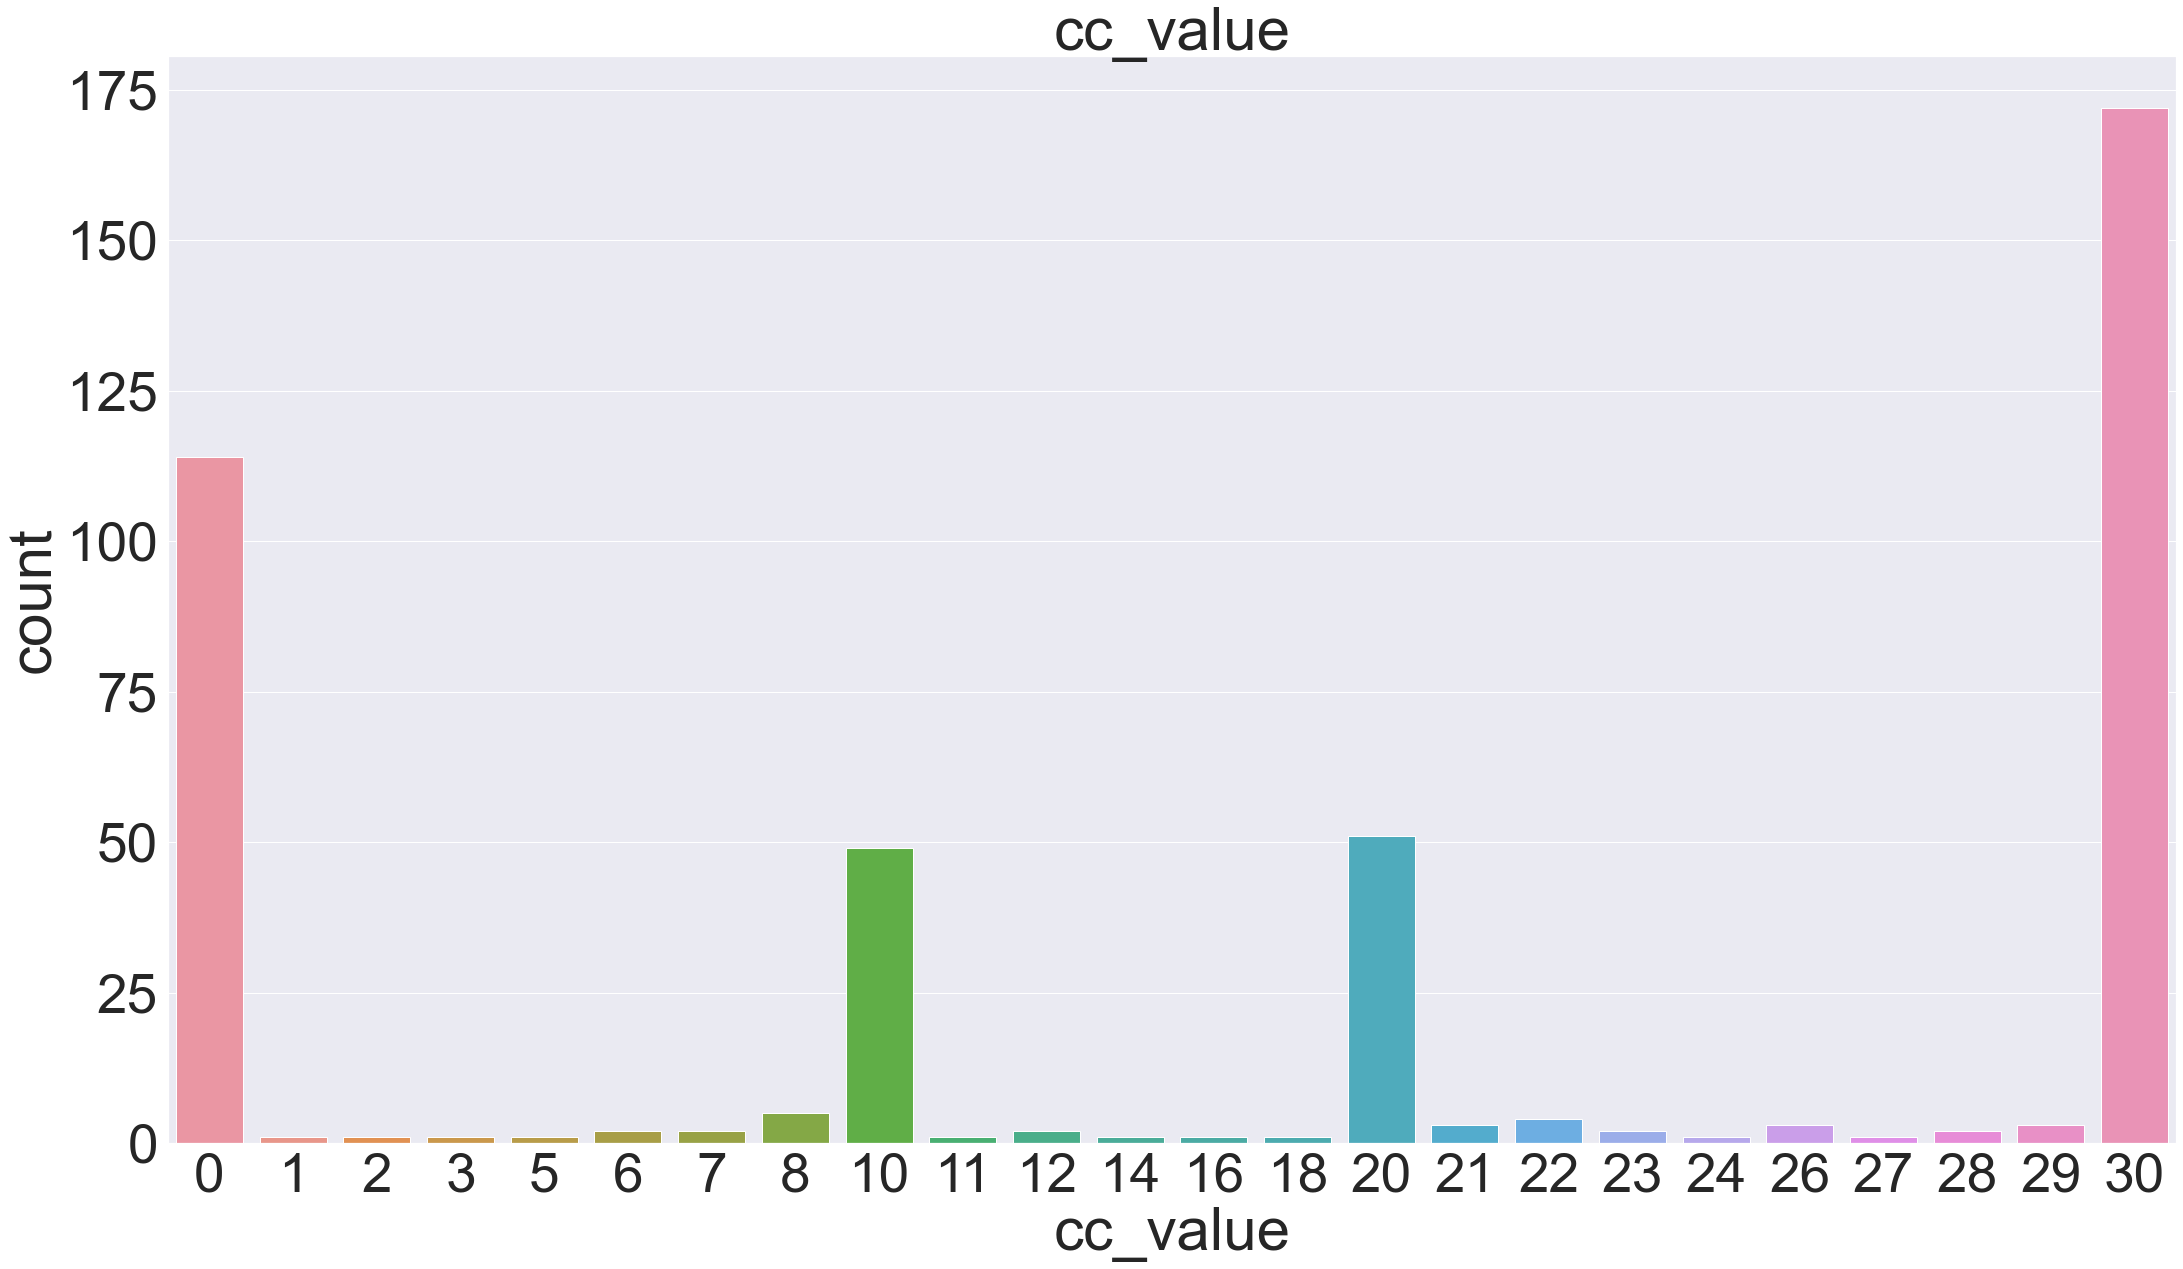

In [13]:
plt.figure(figsize=(36,20))
sns.set(font_scale = 5)
sns.countplot(x="cc_value", data=df).set(title='cc_value')
plt.show()

In [14]:
sub = df[['cc_value', 'goo_nm']].groupby('goo_nm').describe()
sub["cc_value"].sort_values(["mean"], ascending=False)

,count,mean,std,min,25%,50%,75%,max
goo_nm,,,,,,,,
강서구,20.0,27.400000,5.235506,10.0,27.50,30.0,30.0,30.0
도봉구,14.0,26.428571,7.449463,10.0,30.00,30.0,30.0,30.0
강북구,13.0,24.615385,10.500305,0.0,30.00,30.0,30.0,30.0
양천구,18.0,24.388889,9.121009,6.0,18.75,30.0,30.0,30.0
강동구,18.0,23.000000,9.899495,0.0,14.00,30.0,30.0,30.0
광진구,15.0,22.866667,9.568301,0.0,20.00,30.0,30.0,30.0
노원구,18.0,22.833333,10.869547,0.0,20.00,30.0,30.0,30.0
중랑구,16.0,22.687500,9.199411,10.0,10.75,30.0,30.0,30.0
관악구,21.0,21.904762,11.233453,0.0,20.00,30.0,30.0,30.0


## 제로마켓 개수

In [15]:
df.count_zero.value_counts()

0    381
1     40
2      3
Name: count_zero, dtype: int64

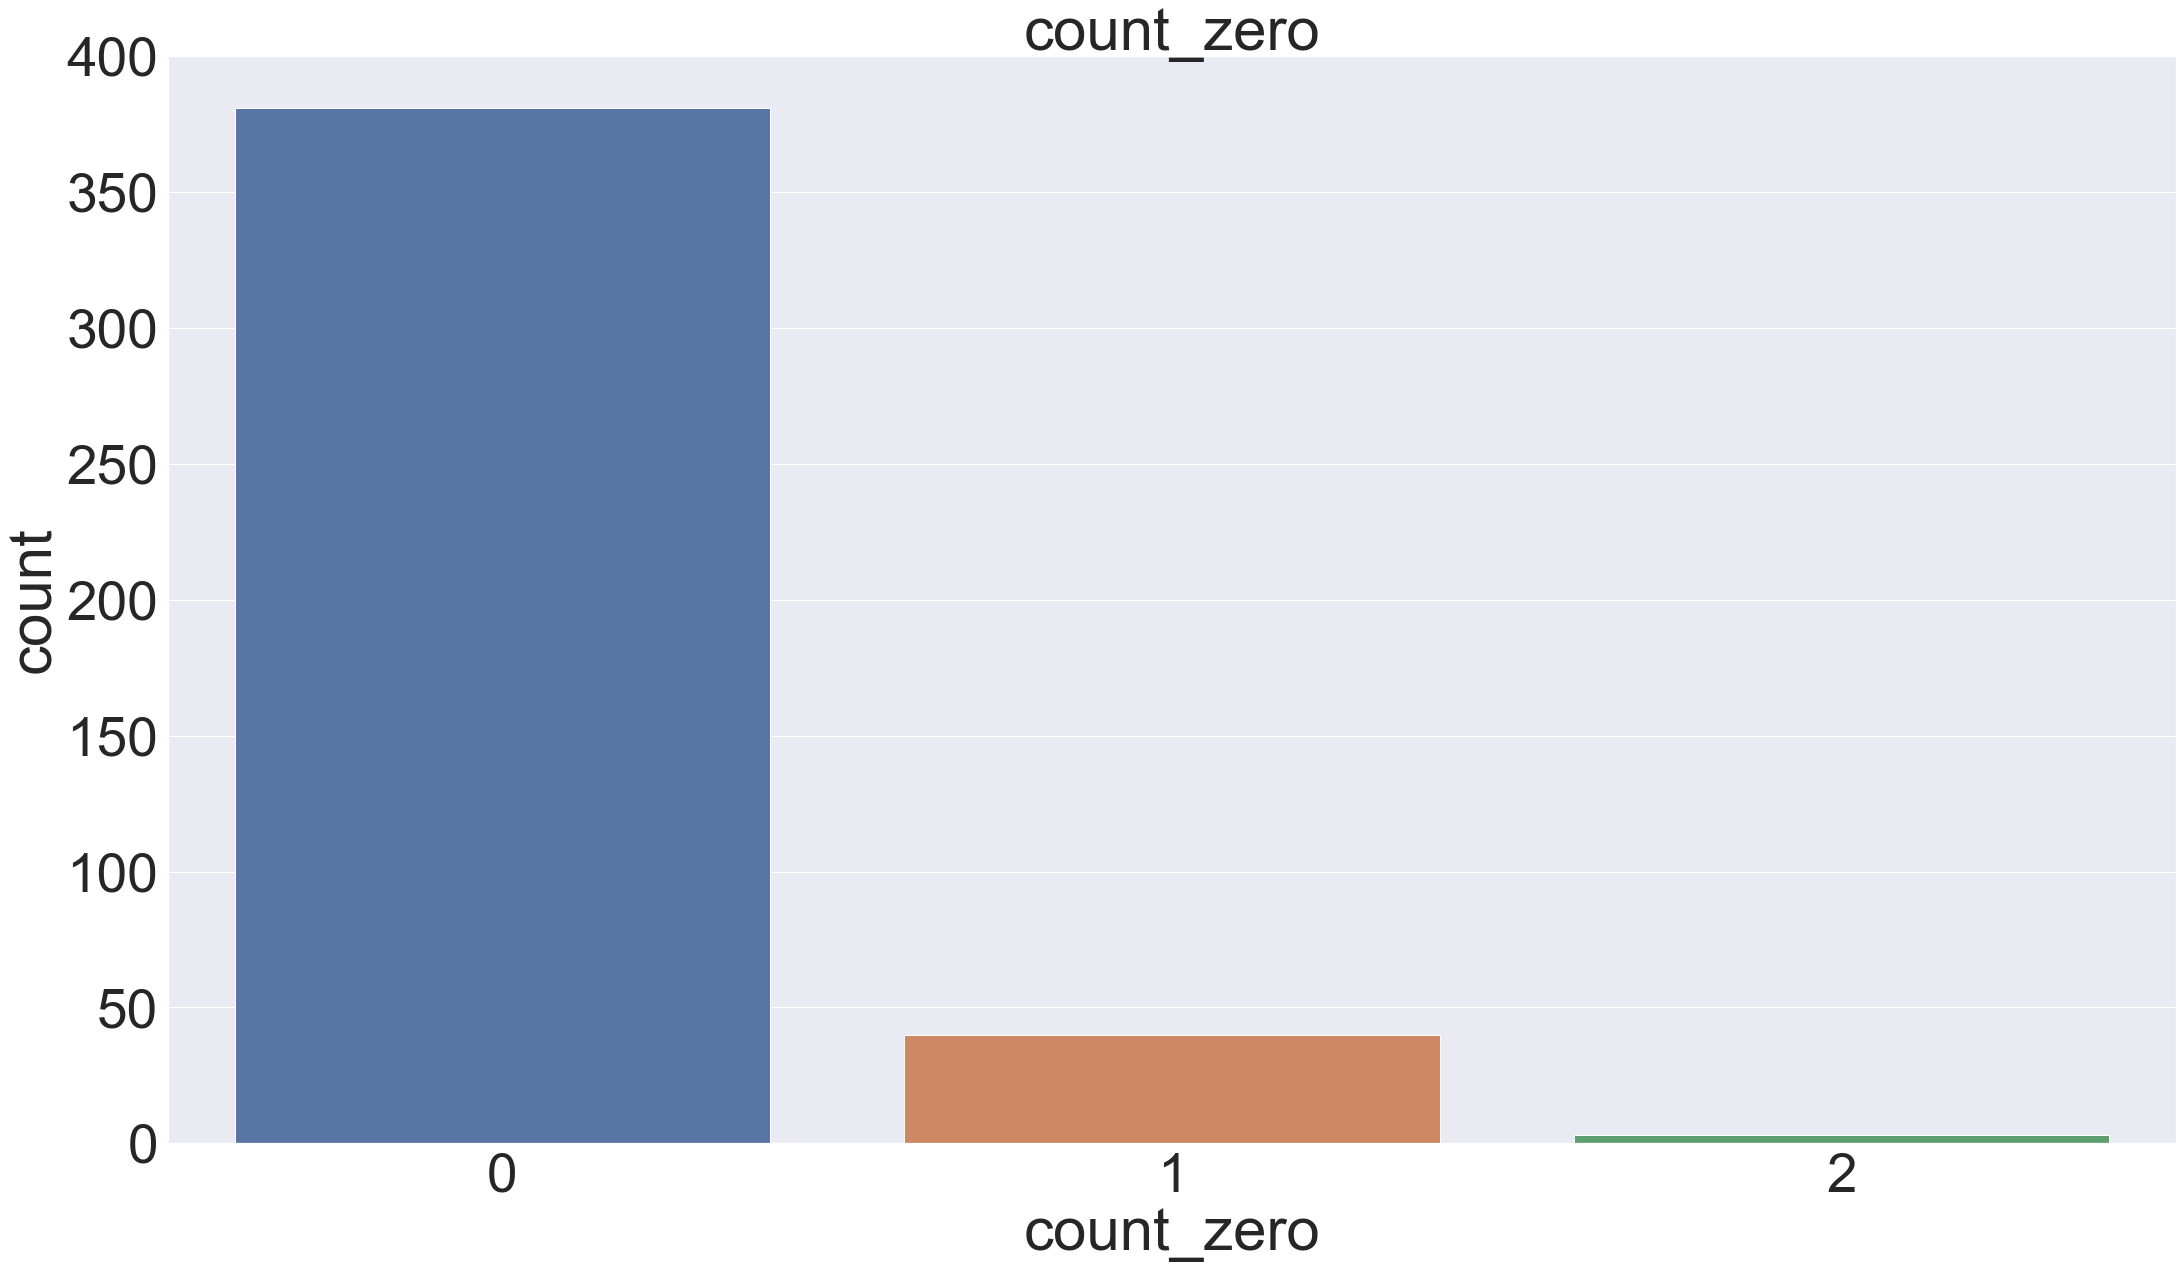

In [16]:
plt.figure(figsize=(36,20))
sns.set(font_scale = 5)
sns.countplot(x="count_zero", data=df).set(title='count_zero')
plt.show()

In [20]:
sub = df[['count_zero', 'goo_nm']].groupby('goo_nm').describe()
sub["count_zero"].sort_values(["mean"], ascending=False)

,count,mean,std,min,25%,50%,75%,max
goo_nm,,,,,,,,
동작구,15.0,0.400000,0.632456,0.0,0.0,0.0,1.00,2.0
서대문구,14.0,0.285714,0.468807,0.0,0.0,0.0,0.75,1.0
마포구,16.0,0.250000,0.447214,0.0,0.0,0.0,0.25,1.0
성동구,17.0,0.176471,0.528594,0.0,0.0,0.0,0.00,2.0
은평구,17.0,0.176471,0.392953,0.0,0.0,0.0,0.00,1.0
강동구,18.0,0.166667,0.514496,0.0,0.0,0.0,0.00,2.0
성북구,20.0,0.150000,0.366348,0.0,0.0,0.0,0.00,1.0
중구,15.0,0.133333,0.351866,0.0,0.0,0.0,0.00,1.0
용산구,16.0,0.125000,0.341565,0.0,0.0,0.0,0.00,1.0


## 1인 가구

sum_pop	/ one_pop	

In [21]:
# numeric = df.drop(columns = {"sum_pop","one_pop"})
numeric = df[["goo_nm","dong_nm","sum_pop","one_pop"]]
numeric

,goo_nm,dong_nm,sum_pop,one_pop
0,송파구,가락1동,9534,1045
1,송파구,가락2동,11482,1892
2,송파구,가락본동,10576,2642
3,구로구,가리봉동,4901,2244
4,금천구,가산동,14124,8016
...,...,...,...,...
419,용산구,효창동,3922,894
420,용산구,후암동,7283,2314
421,동대문구,휘경1동,6643,2730
422,동대문구,휘경2동,10915,3915


In [22]:
new_gu_pop = df[["dong_nm","one_pop"]]
new_gu_pop

,dong_nm,one_pop
0,가락1동,1045
1,가락2동,1892
2,가락본동,2642
3,가리봉동,2244
4,가산동,8016
...,...,...
419,효창동,894
420,후암동,2314
421,휘경1동,2730
422,휘경2동,3915


ggplot 시각화 이용         
https://blog.naver.com/PostView.naver?blogId=youji4ever&logNo=222521226261&categoryNo=0&parentCategoryNo=0&currentPage=1

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


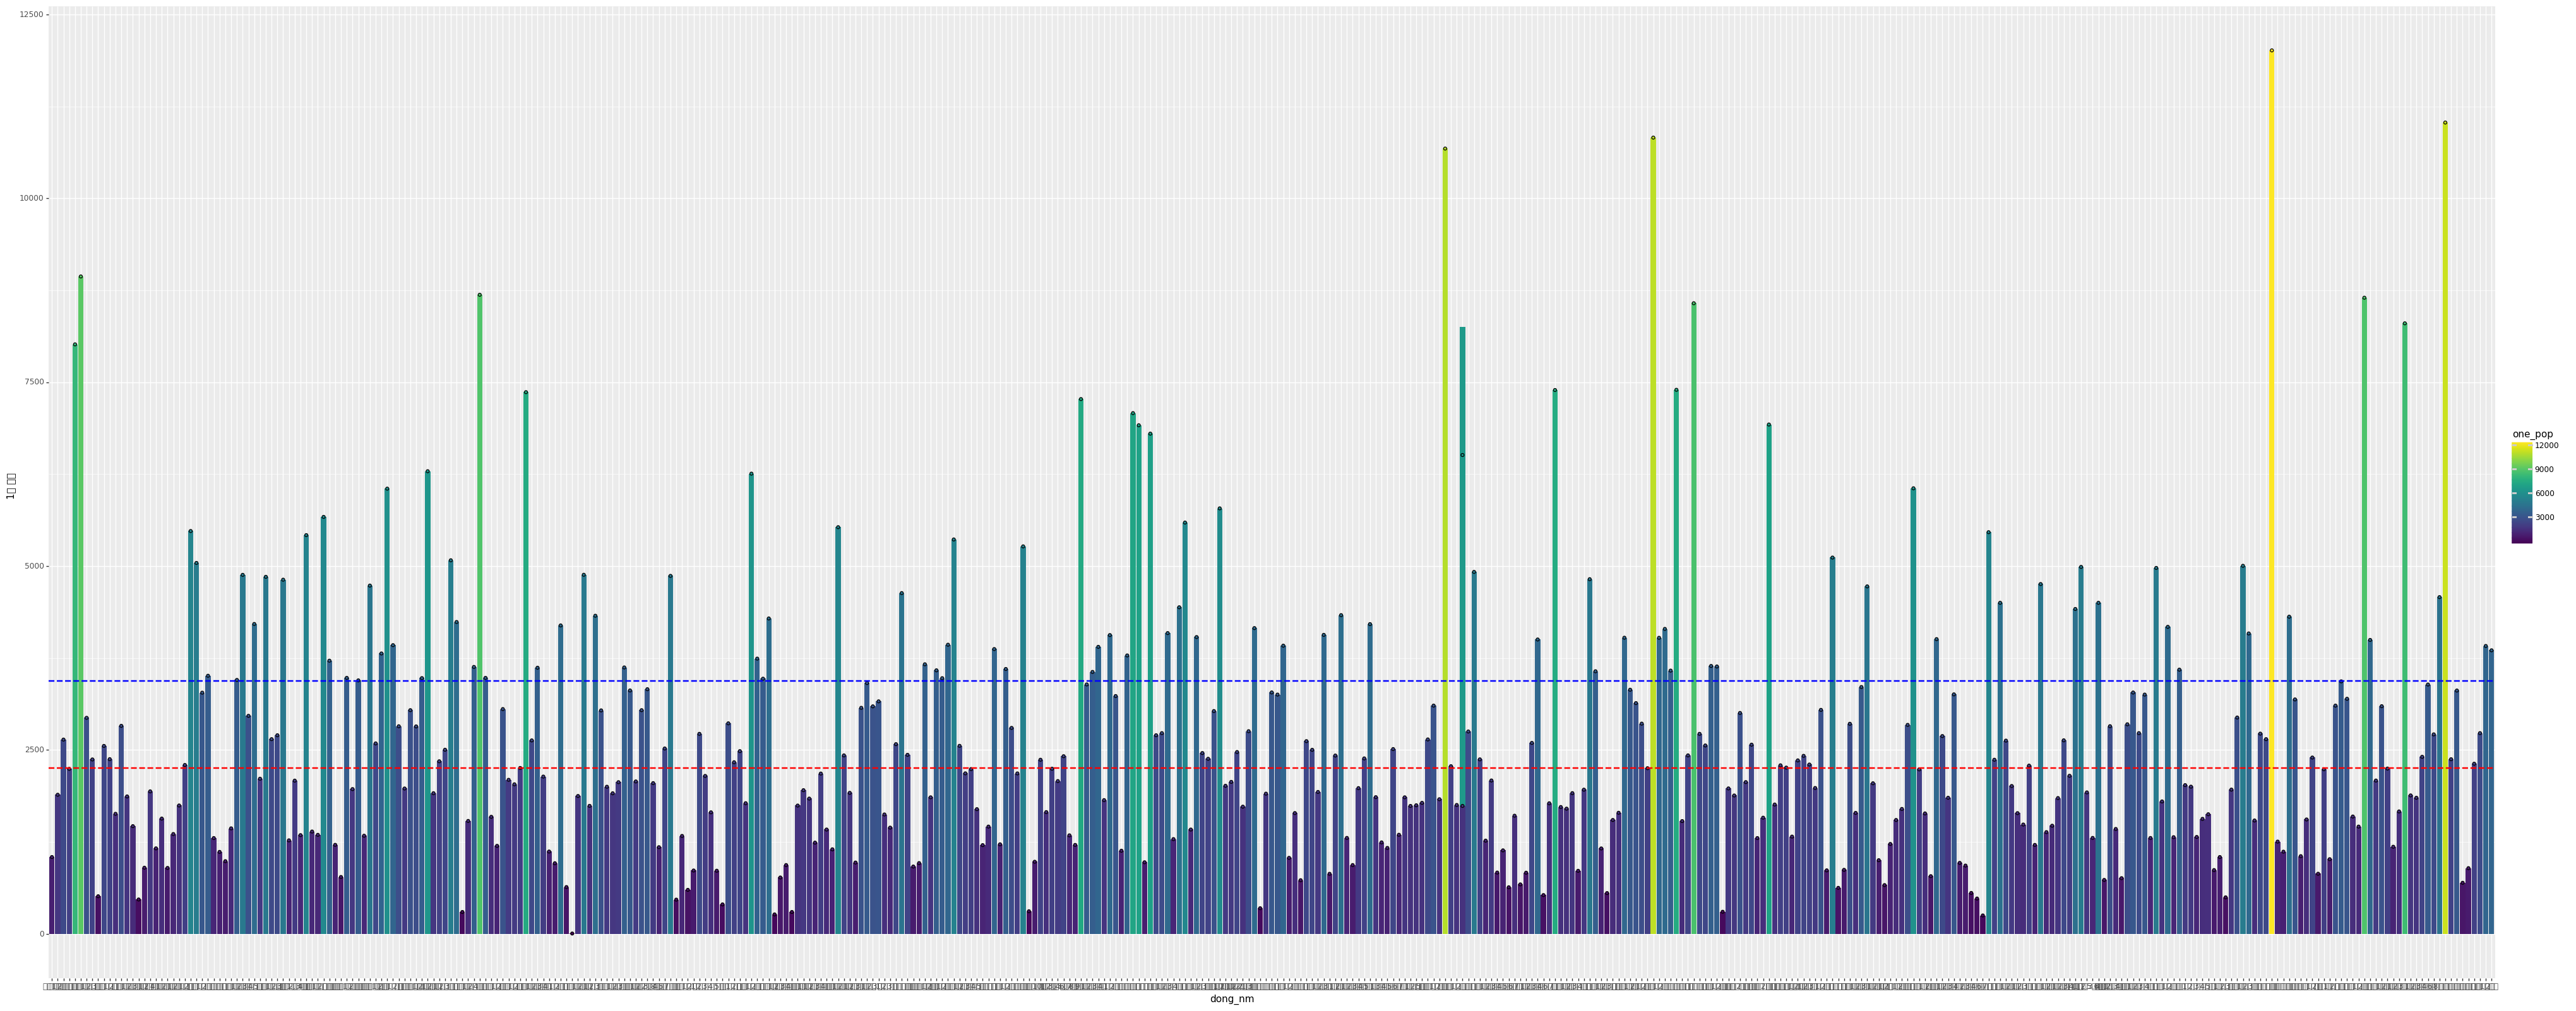

<ggplot: (164235608561)>

In [23]:
(ggplot(new_gu_pop)
+ aes(x = 'dong_nm', y = 'one_pop', fill = 'one_pop')
+ geom_bar(stat = 'identity')
+ geom_point()
+geom_hline(yintercept=new_gu_pop['one_pop'].median(), linetype='dashed', color='red', size=1)
+geom_hline(yintercept=new_gu_pop['one_pop'].quantile(0.75), linetype='dashed', color='blue', size=1)
+ labs(x='dong_nm', y='1인 가구')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (50,20)) 
)

# 동별 상관관계 파악

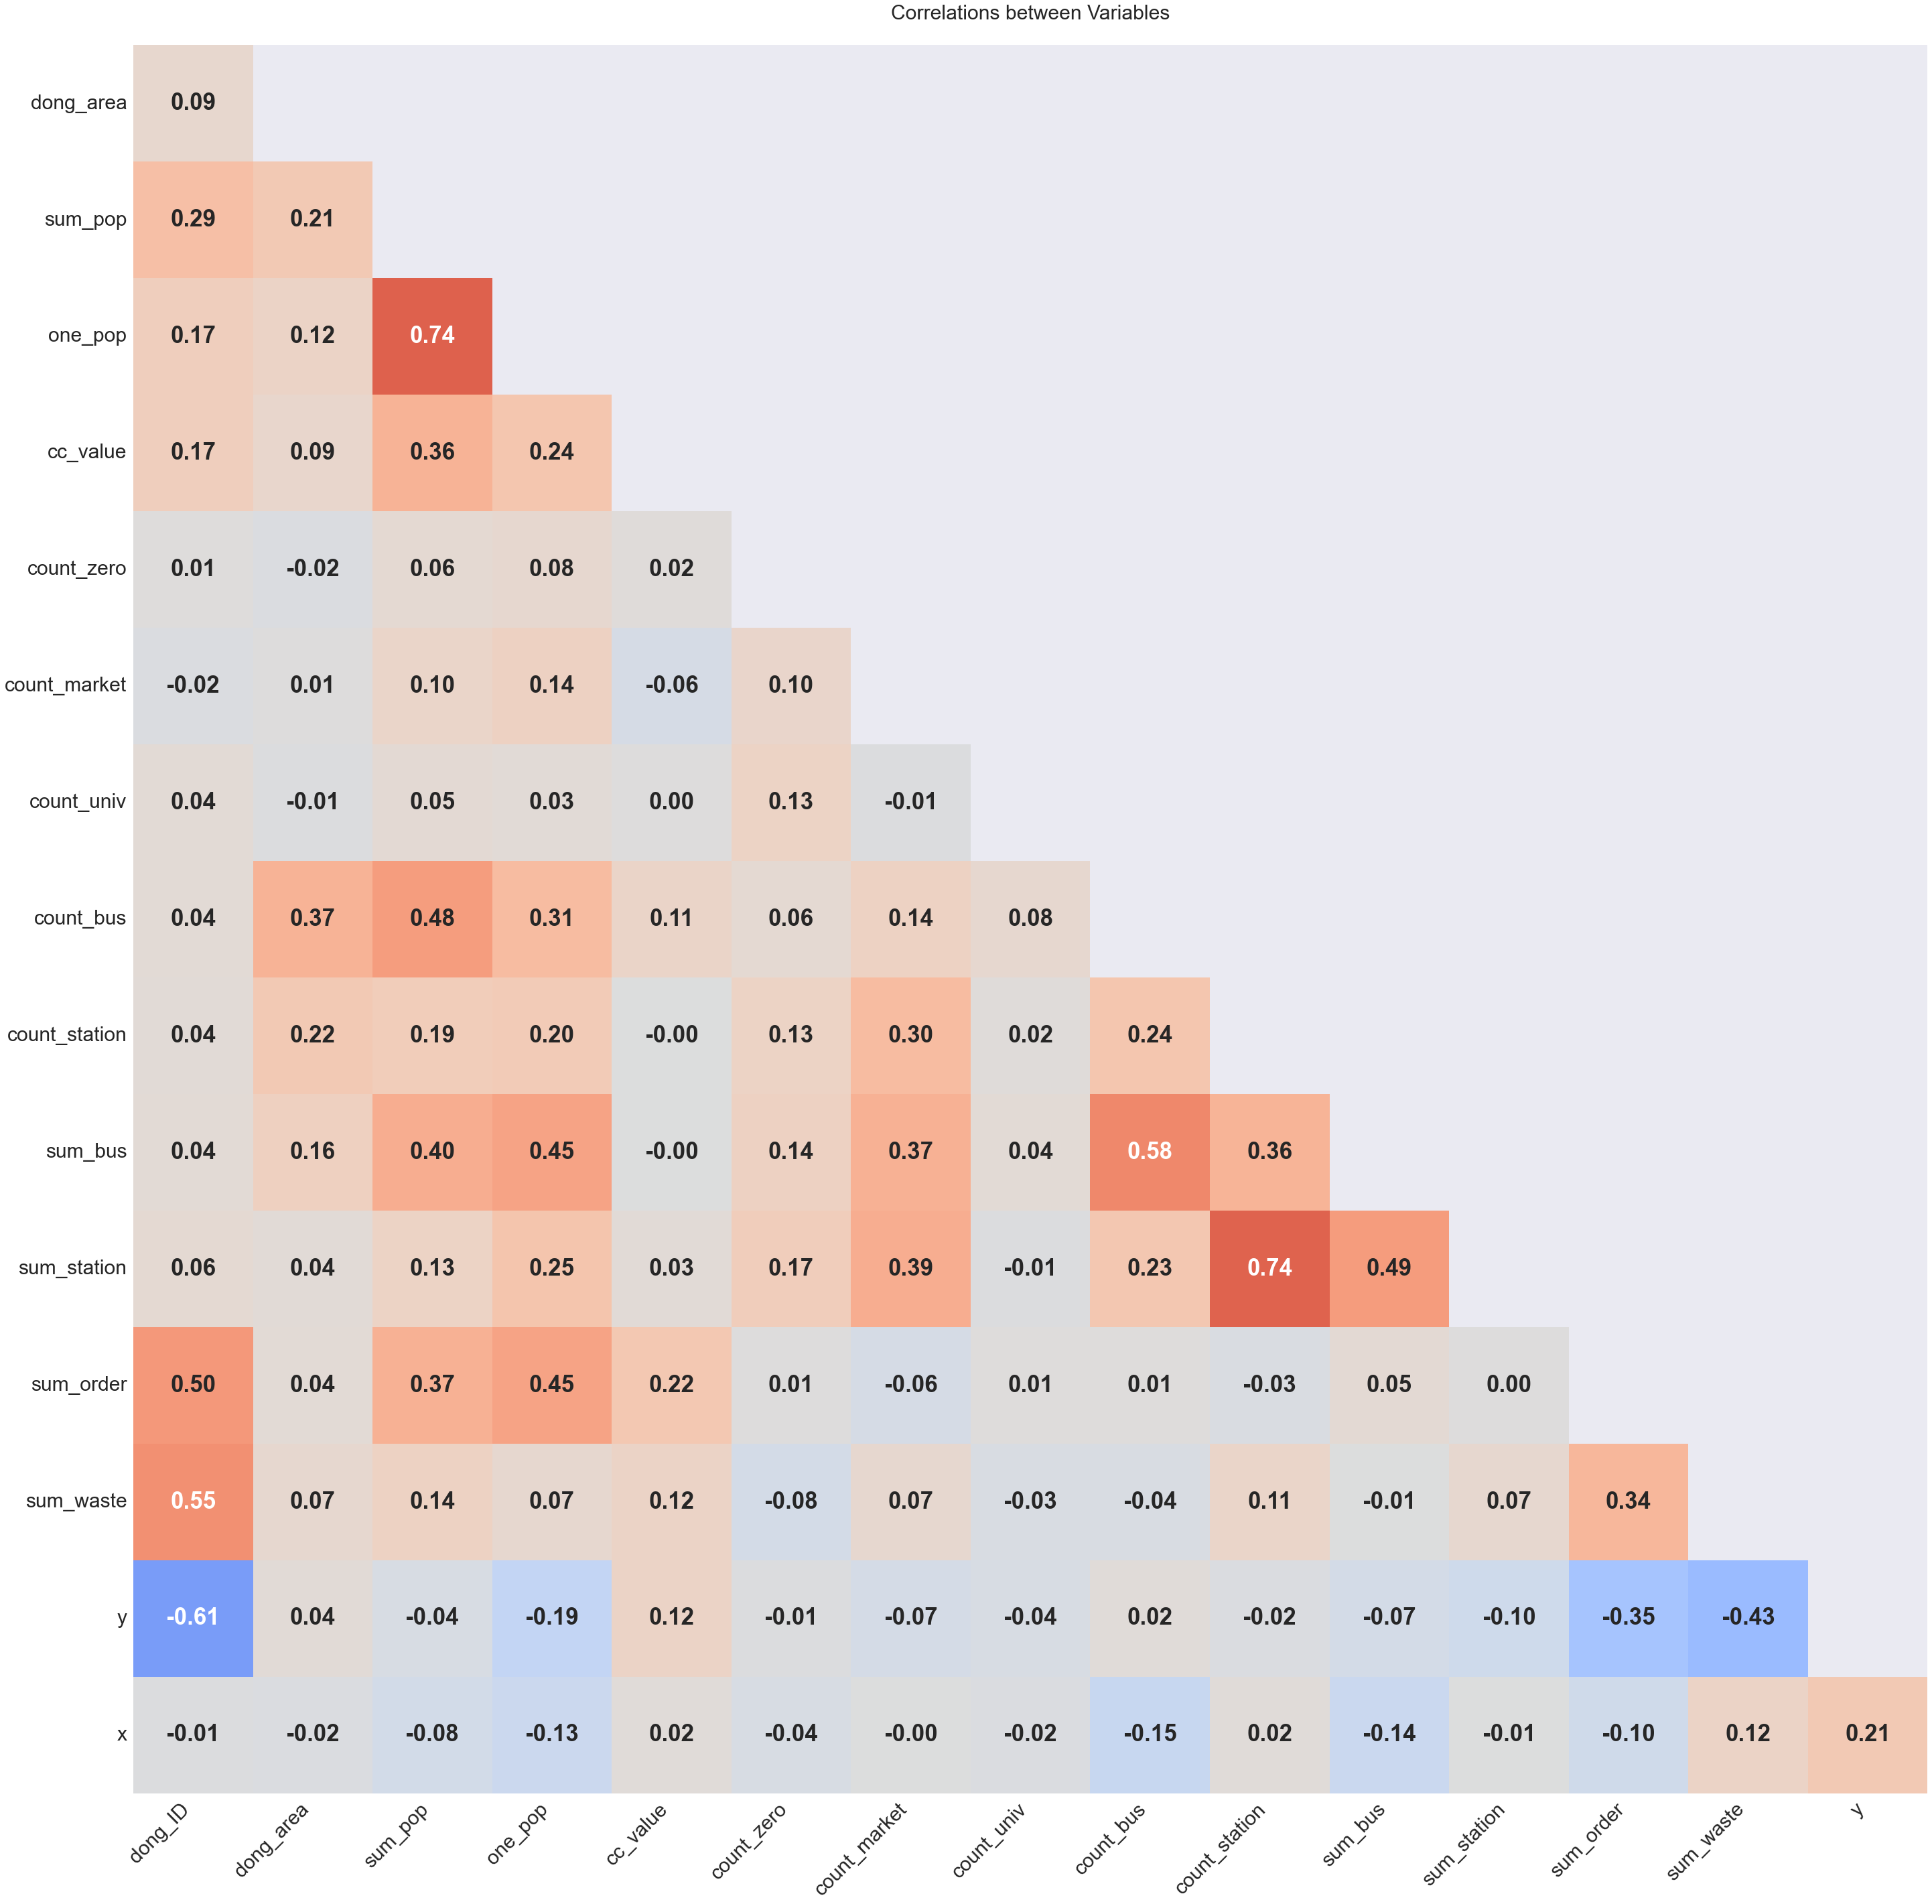

In [124]:
%matplotlib inline
sample = df.copy()
corr=sample.drop(columns=['dong_nm']).corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(48,48))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':35,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=30)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=30)
plt.title('Correlations between Variables\n', fontsize=30)
fig.show()

In [126]:
corr=sample.drop(columns=['dong_nm']).corr()
s = corr.unstack()
df = pd.DataFrame(s[s < 1].abs().sort_values(ascending=False), columns=['corr'])   # 상관계수의 절댓값 크기순으로 정렬
df = df[df['corr'] >= 0.4]
df.style.background_gradient(cmap='viridis') 

,,corr
one_pop,sum_pop,0.742634
sum_pop,one_pop,0.742634
sum_station,count_station,0.738862
count_station,sum_station,0.738862
dong_ID,y,0.613038
y,dong_ID,0.613038
sum_bus,count_bus,0.582234
count_bus,sum_bus,0.582234
dong_ID,sum_waste,0.546249
sum_waste,dong_ID,0.546249
